### **Libraries & Data**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img1 = cv2.imread('/content/2.jpeg')
img2 = cv2.imread('/content/3.jpeg')
img3 = cv2.imread('/content/4.jpg')

### **Techniques**

In [ ]:
def sobel(image):
  gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
  gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
  gradient = np.sqrt(gradient_x**2 + gradient_y**2)
  return gradient

In [ ]:
def prewitt(image):
  kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
  kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
  gradient_x = cv2.filter2D(image, cv2.CV_64F, kernel_x)
  gradient_y = cv2.filter2D(image, cv2.CV_64F, kernel_y)
  gradient = np.sqrt(gradient_x**2 + gradient_y**2)
  return gradient

In [ ]:
def robert(image):
  kernel_x = np.array([[1, 0], [0, -1]])
  kernel_y = np.array([[0, -1], [1, 0]])
  gradient_x = cv2.filter2D(image, cv2.CV_64F, kernel_x)
  gradient_y = cv2.filter2D(image, cv2.CV_64F, kernel_y)
  edges = np.sqrt(gradient_x**2 + gradient_y**2)
  return edges

In [ ]:
def laplacian(image):
  edges = cv2.Laplacian(image, cv2.CV_64F)
  return edges

In [ ]:
def canny(image, a, b):
  edges = cv2.Canny(image, a, b)
  return edges

In [ ]:
def hough(image):
  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  edges = cv2.Canny(gray,50,150,apertureSize=3)
  lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=5, maxLineGap=10)
  result = image.copy()
  for points in lines:
    x1,y1,x2,y2=points[0]
    cv2.line(result,(x1,y1),(x2,y2),(255,255,0),2)

  return result

### **Application**

In [ ]:
def show(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  sobel_edges = sobel(gray)
  prewitt_edges = prewitt(gray)
  robert_edges = robert(gray)
  laplacian_edges = laplacian(gray)
  canny_edges = canny(gray, 50, 100)
  hough_image = hough(image)

  plt.figure(figsize = (15,15))

  plt.subplot(331), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(332), plt.imshow(sobel_edges, cmap='gray'), plt.title('Sobel Operator'), plt.xticks([]), plt.yticks([])
  plt.subplot(333), plt.imshow(prewitt_edges, cmap='gray'), plt.title('Prewitt Operator'), plt.xticks([]), plt.yticks([])
  plt.subplot(334), plt.imshow(robert_edges, cmap='gray'), plt.title('Robert Operator'), plt.xticks([]), plt.yticks([])
  plt.subplot(335), plt.imshow(laplacian_edges, cmap='gray'), plt.title('Laplacian Edge Detection'), plt.xticks([]), plt.yticks([])
  plt.subplot(336), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])
  plt.subplot(337), plt.imshow(cv2.cvtColor(hough_image, cv2.COLOR_BGR2RGB)), plt.title('Hough Transform'), plt.xticks([]), plt.yticks([])

  plt.show()

## **Results**

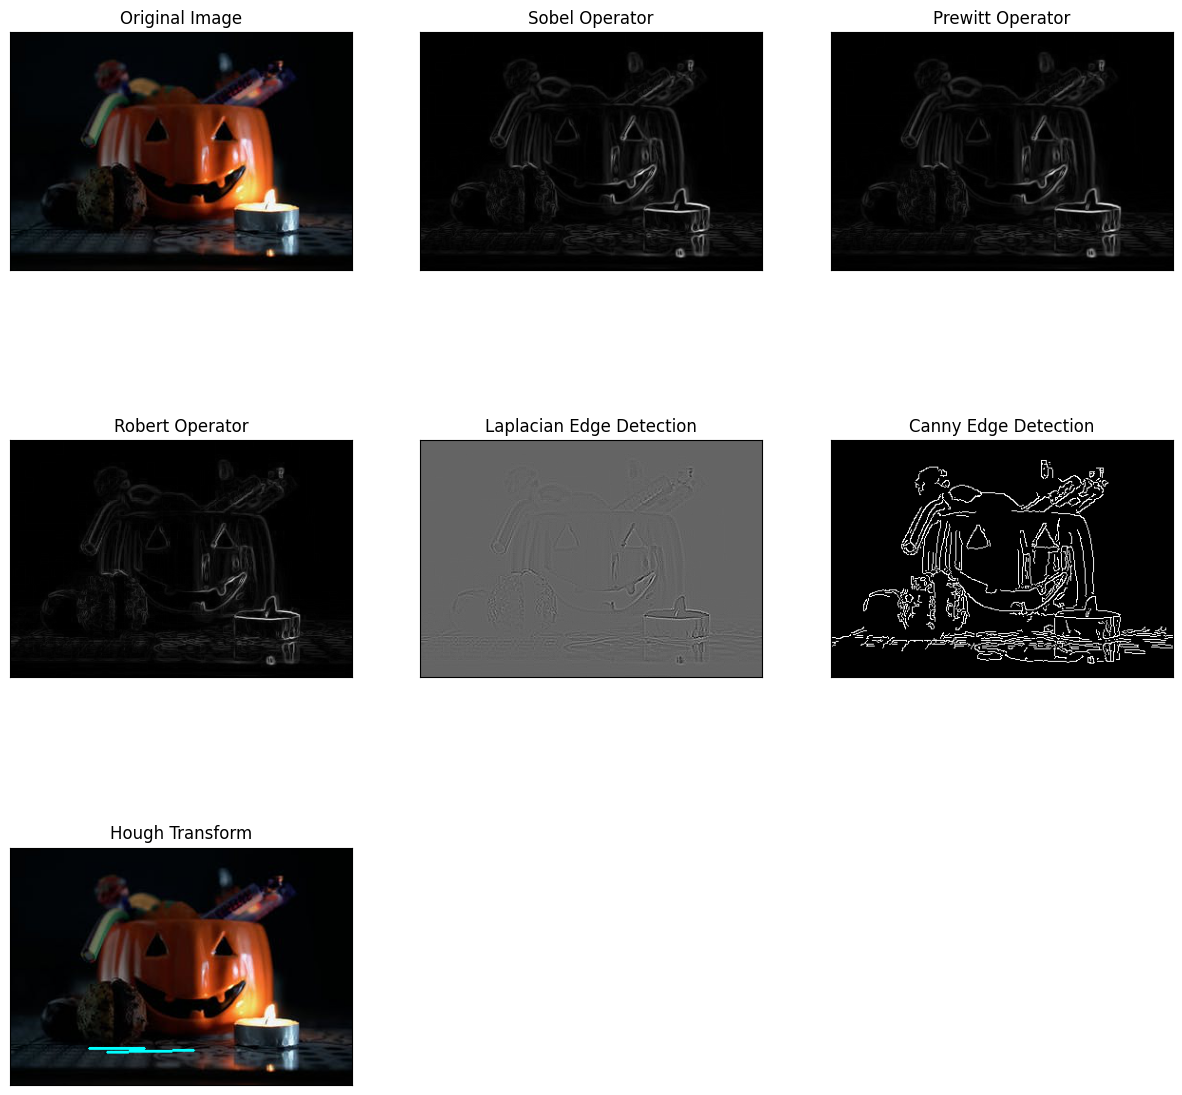

In [ ]:
show(img1)

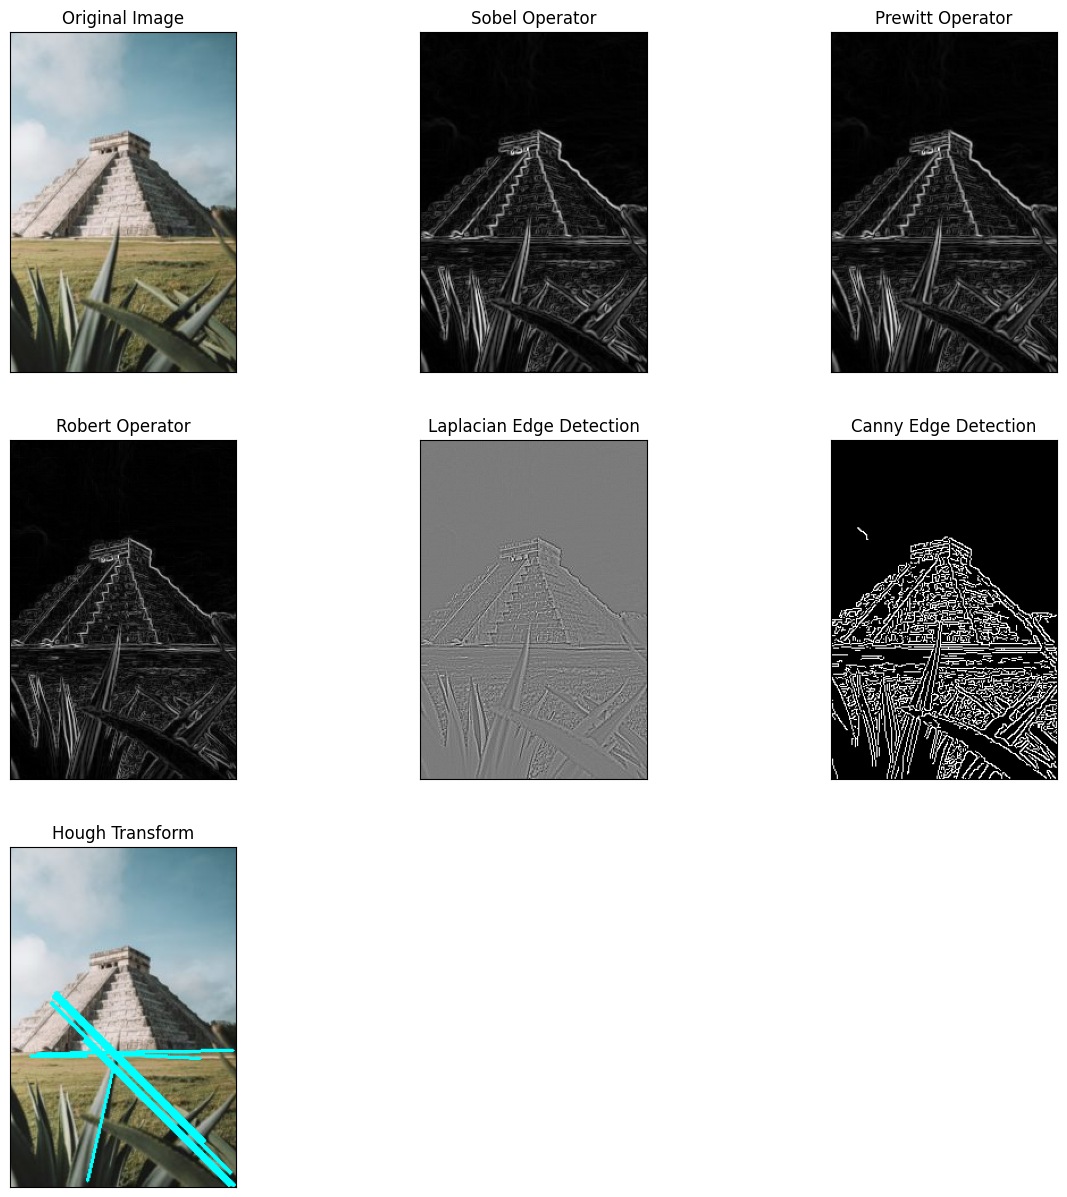

In [ ]:
show(img2)

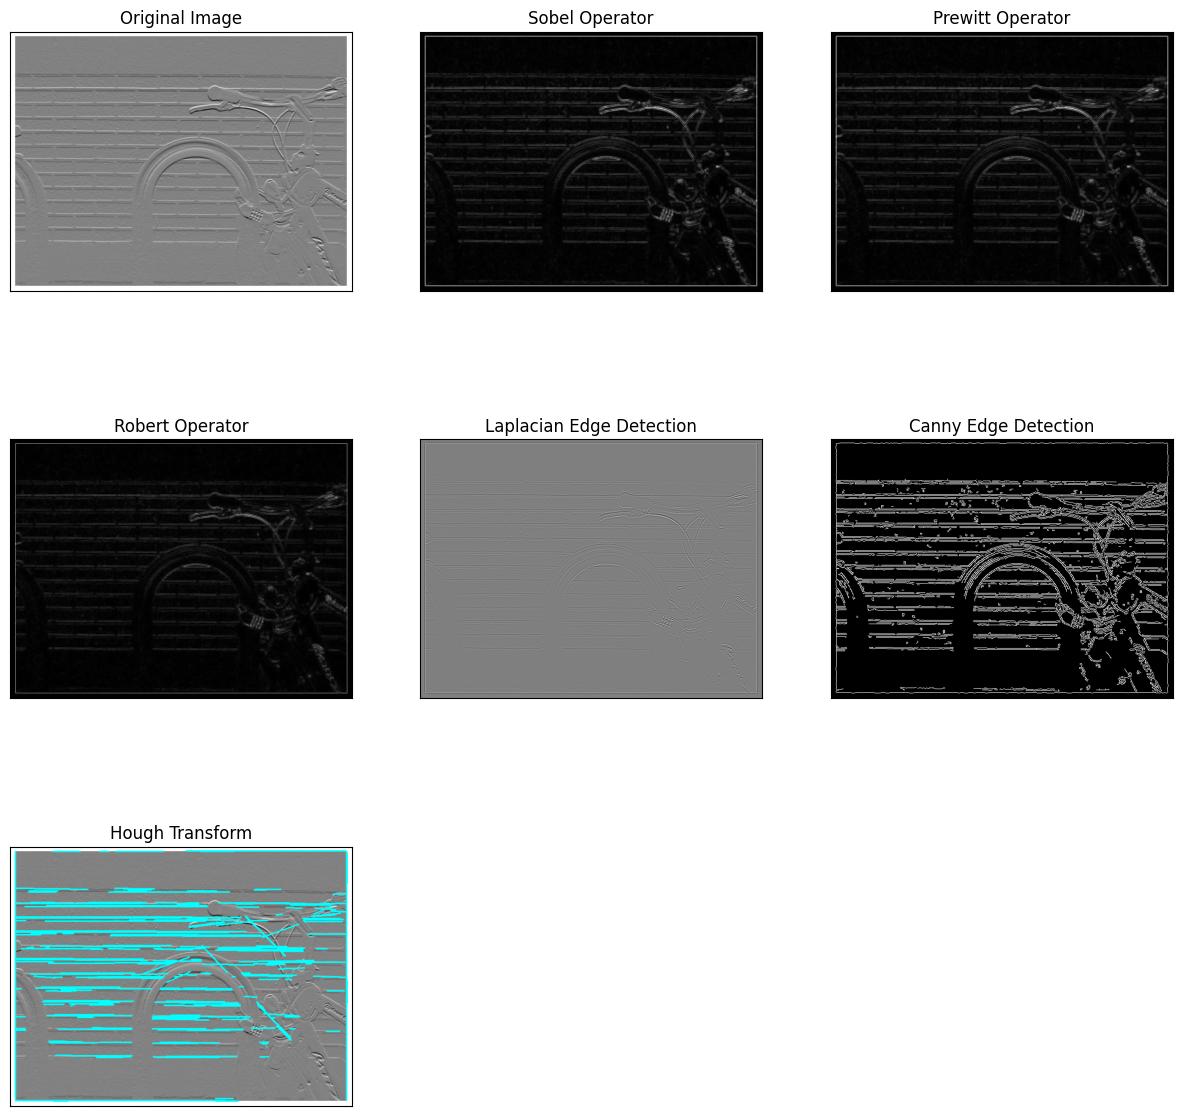

In [ ]:
show(img3)

### **Conclusion**

Clearly, **Canny Edge Detection** method gives the best results among all the techniques mentioned. Thank You :)

